# CHAPTER 05. DFS/BFS
- 그래프를 탐색하기 위한 대표적인 두 가지 알고리즘

## 1. 꼭 필요한 자료구조 기초
- **탐색(Search)** : 많은 양의 데이터 중에서 원하는 데이터를 찾은 과정
    - 그래프, 트리 등의 자료구조 안에서 탐색하는 문제를 자주 다룬다.
    - 대표적인 탐색 알고리즘: DFS, BFS
    - DFS와 BFS를 알려면 스택, 큐, 재귀 함수를 알아야 한다.
- **자료구조(Data Structure)** : 데이터를 표현하고 관리하고 처리하기 위한 구조
    - 스택과 큐는 자료구조의 기초 개념. 두 가지 핵심적인 함수로 구성
        - **삽입(Push)** : 데이터를 삽입한다.
        - **삭제(Pop)** : 데이터를 삭제한다.
    - 스택, 큐를 사용할 때는 삽입, 삭제 외에 오버플로, 언더플로도 고민해야 한다.
        - 오버플로(Overflow) : 특정한 자료구조가 수용할 수 있는 데이터의 크기를 이미 가득 찬 상태에서 삽입 연산을 수행할 때 발생
        - 언더플로(Underflow) : 특정한 자료구조에 데이터가 전혀 들어있지 않은 상태에서 삭제 연산을 수행할 때 발생

### 스택
- **스택(Stack)** : 박스 쌓기
    - 아래에서부터 위로 차곡차곡 쌓는다.
    - 아래에 있는 박스를 치우기 위해서는 위에 있는 박스를 먼저 내려야 한다.
    - 선입후출(First In Last Out), 후입선출(Last In First Out) 구조

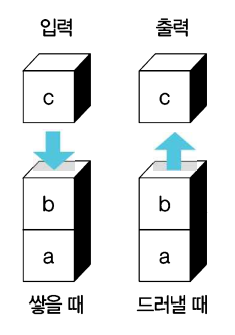

- 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()

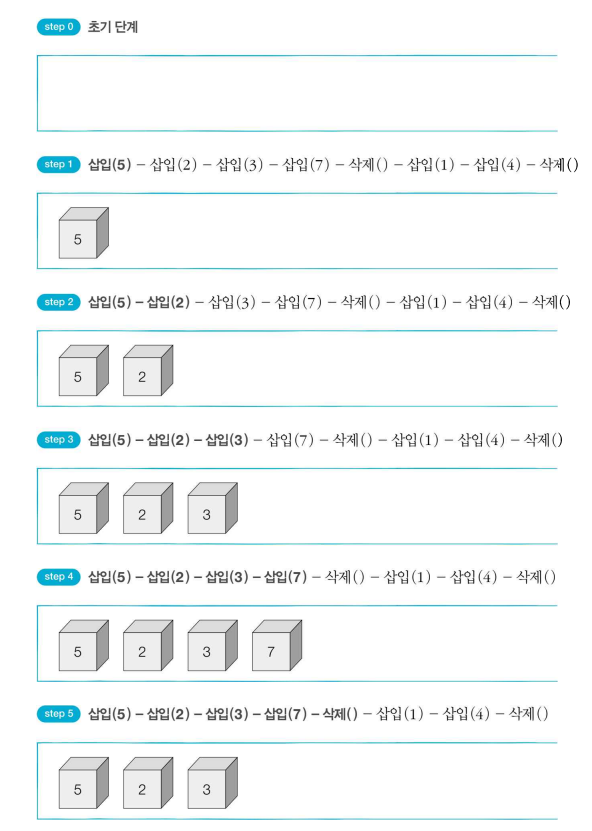

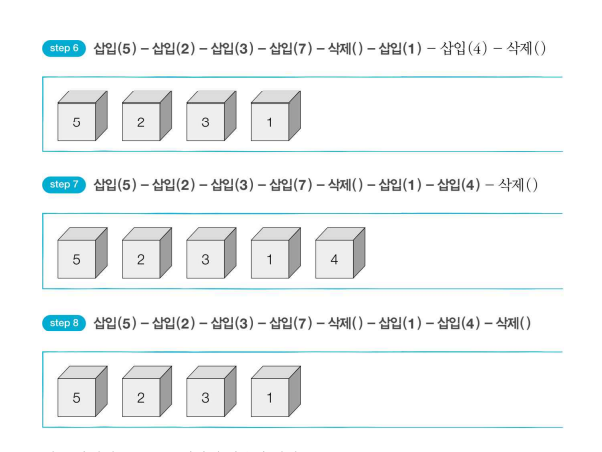

In [2]:
## 스택 예제
stack = []

# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack.pop()
stack.append(1)
stack.append(4)
stack.pop()

print(stack)        # 최하단 원소부터 출력
print(stack[::-1])  # 최상단 원소부터 출력

[5, 2, 3, 1]
[1, 3, 2, 5]


- 파이썬에서 스택을 이용할 때에는 별도의 라이브러리를 사용할 필요가 없다.
- 기본 리스트에서 append()와 pop() 메서드를 이용하면 스택 자료구조와 동일하게 동작한다.
- append() 메서드는 리스트의 가장 뒤쪽에 데이터를 삽입하고, pop() 메서드는 리스트의 가장 뒤쪽에서 데이터를 꺼내기 때문이다.

### 큐
- **큐(Queue)** : 대기 줄에 비유할 수 있다.
    - 줄을 설 때 먼저 온 사람이 먼저 들어감. 
    - 나중에 온 사람일 수록 나중에 들어가므로 '공정한'자료구조라고 비유됨.
    - 선입선출(First In First Out) 구조

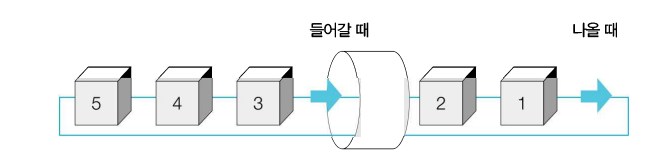

- 큐에서 일련의 연산을 수행하면 => 입구와 출구가 모두 뚫려 있는 터널과 같은 형태로 시각화 할 수 있다.
- 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()

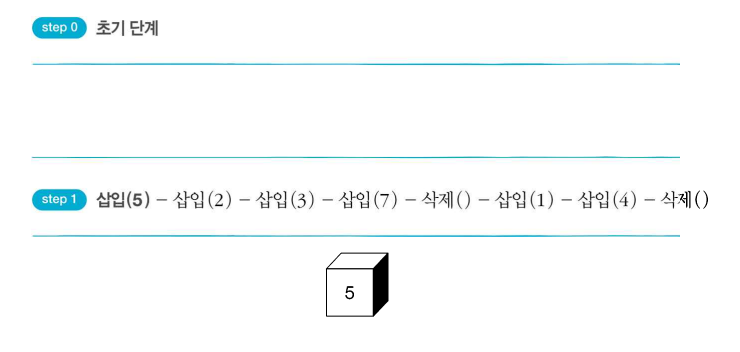

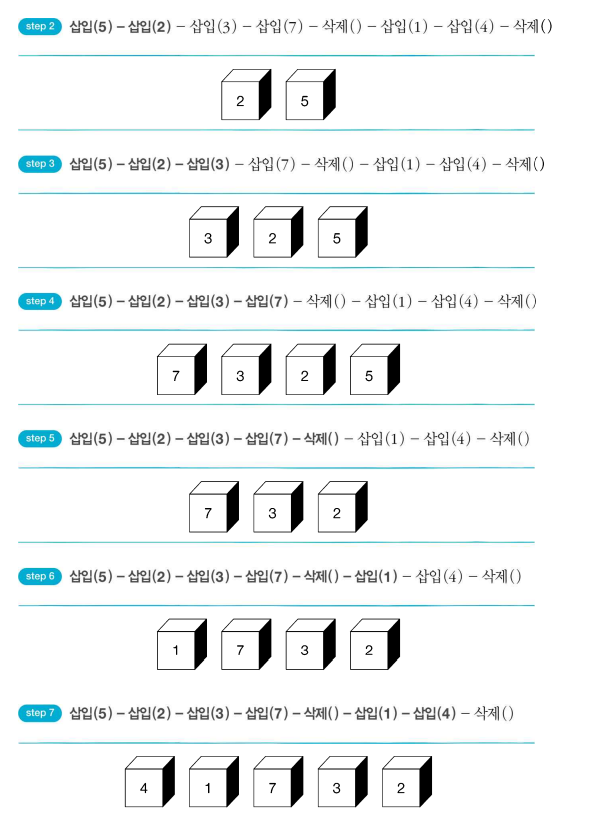

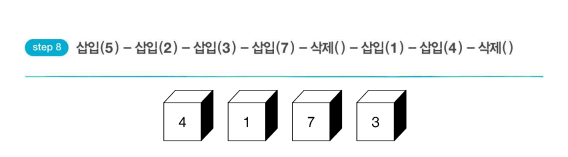

- 파이썬 코드로 표현하면 다음과 같다. 큐의 앞쪽 원소부터 출력하는 코드와 뒤쪽 원소부터 출력하는 내용을 모두 포함한다.

In [3]:
## 큐 예제

from collections import deque

# 큐(Queue) 구현을 위해 deque 라이브러리 사용
queue = deque()

# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()
queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()

print(queue)    # 먼저 들어온 순서대로 출력
queue.reverse() # 다음 출력을 위해 역순으로 바꾸기
print(queue)    # 나중에 들어온 원소부터 출력

deque([3, 7, 1, 4])
deque([4, 1, 7, 3])


- 파이썬으로 큐를 구현할 때는 collections 모듈에서 제공하는 deque 자료구조를 활용한다.
- deque는 스택과 큐의 장점을 모두 채택한 것인데 데이터를 넣고 빼는 속도가 리스트 자료형에 비해 효율적이며 queue 라이브러리를 이용하는 것보다 더 간단하다.
- 대부분의 코딩 테스트에서는 collections 모듈과 같은 기본 라이브러리 사용을 허용하므로 안심하고 사용해도 괜찮다.
- deque 객체를 리스트 자료형으로 변경하고자 한다면 list() 메서드를 이용하자.
- 이 소스코드에서 list(queue)를 하면 리스트 자료형이 반환된다.

### 재귀 함수
- **재귀 함수(Recursive Function)** : 자기 자신을 다시 호출하는 함수
    - DFS와 BFS를 구현하려면 재귀 함수도 이해하고 있어야 한다.

In [5]:
## 재귀 함수 예제

def recursive_function():
    print('재귀 함수를 호출합니다.')
    recursive_function()

recursive_function()

재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를 호출합니다.
재귀 함수를

RecursionError: ignored

- 재귀(Recursion)의 최대 깊이를 초과했다는 내용이다.
- 파이썬 인터프리터는 호출 횟수 제한이 있는데 이 한계를 벗어났기 때문이다.
- 무한대로 재귀 호출을 진행할 수는 없다. (애초에 무한한 재귀 호출을 요구하는 문제 또한 출제되지 않을 것이다.)
- 프로그래밍 대회에서는 재귀 함수를 스택을 이용한 함수처럼 동작하도록 자동으로 변경해주는 라이브러리를 사용하기도 한다.
- 파이썬의 재귀 호출 제한을 처리하기 위한 또 다른 테크닉이며, 일반적인 코딩 테스트에서는 사용할 일이 적다.

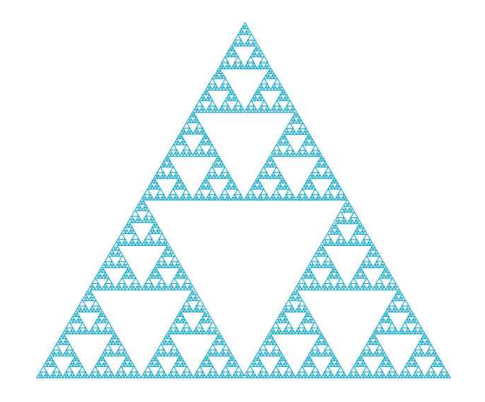

- 재귀 함수는 프랙털(Fractal) 구조와 흡사하다.
- 시에르핀스키의 삼각형(Sierpinski Triangle) : 삼각형 안에 또 다른 삼각형이 무한히 존재하는 프랙털 구조의 대표적인 그림이다.(실제로 프렉터 이미지를 출력하는 프로그램을 작성할 때 재귀 함수를 이용한다.)

#### 재귀 함수의 종료 조건
- 재귀 함수를 문제 풀이에서 사용할 때는 재귀 함수가 언제 끝날지, 종료 조건을 꼭 명시해야 한다.
- 종료 조건을 명시하지 않으면 함수가 무한 호출될 수 있다.
- 아래 코드에서는 if문이 종료 조건 역할을 수행한다.

In [6]:
## 재귀 함수 종료 예제

def recursive_function(i):
    # 100번째 출력할 때 종료되도록 종료 조건 명시
    if i == 100:
        return

    print(i, '번째 재귀 함수에서', i+1, '번째 재귀 함수를 호출합니다.')
    recursive_function(i+1)
    print(i, '번째 재귀 함수를 종료합니다.')

recursive_function(1)

1 번째 재귀 함수에서 2 번째 재귀 함수를 호출합니다.
2 번째 재귀 함수에서 3 번째 재귀 함수를 호출합니다.
3 번째 재귀 함수에서 4 번째 재귀 함수를 호출합니다.
4 번째 재귀 함수에서 5 번째 재귀 함수를 호출합니다.
5 번째 재귀 함수에서 6 번째 재귀 함수를 호출합니다.
6 번째 재귀 함수에서 7 번째 재귀 함수를 호출합니다.
7 번째 재귀 함수에서 8 번째 재귀 함수를 호출합니다.
8 번째 재귀 함수에서 9 번째 재귀 함수를 호출합니다.
9 번째 재귀 함수에서 10 번째 재귀 함수를 호출합니다.
10 번째 재귀 함수에서 11 번째 재귀 함수를 호출합니다.
11 번째 재귀 함수에서 12 번째 재귀 함수를 호출합니다.
12 번째 재귀 함수에서 13 번째 재귀 함수를 호출합니다.
13 번째 재귀 함수에서 14 번째 재귀 함수를 호출합니다.
14 번째 재귀 함수에서 15 번째 재귀 함수를 호출합니다.
15 번째 재귀 함수에서 16 번째 재귀 함수를 호출합니다.
16 번째 재귀 함수에서 17 번째 재귀 함수를 호출합니다.
17 번째 재귀 함수에서 18 번째 재귀 함수를 호출합니다.
18 번째 재귀 함수에서 19 번째 재귀 함수를 호출합니다.
19 번째 재귀 함수에서 20 번째 재귀 함수를 호출합니다.
20 번째 재귀 함수에서 21 번째 재귀 함수를 호출합니다.
21 번째 재귀 함수에서 22 번째 재귀 함수를 호출합니다.
22 번째 재귀 함수에서 23 번째 재귀 함수를 호출합니다.
23 번째 재귀 함수에서 24 번째 재귀 함수를 호출합니다.
24 번째 재귀 함수에서 25 번째 재귀 함수를 호출합니다.
25 번째 재귀 함수에서 26 번째 재귀 함수를 호출합니다.
26 번째 재귀 함수에서 27 번째 재귀 함수를 호출합니다.
27 번째 재귀 함수에서 28 번째 재귀 함수를 호출합니다.
28 번째 재귀 함수에서 29 번째 재귀 함수를 호출합니다.
29 번째 재귀 함수에서 30 번째 재귀 함수를 호출합니다.
30 번째 재귀 함수에서 31 번째 재귀 함수를 호출합니

- 컴퓨터 내부에서 재귀 함수의 수행은 스택 자료구조를 이용한다.
- 함수를 계속 호출했을 때 가장 마지막에 호출한 함수가 먼저 수행을 끝내야 그 앞의 호출이 종료되기 때문이다.
- 컴퓨터의 구조 측면에서 보자면 연속해서 호출되는 함수는 메인 메모리의 스택 공간에 적재되므로 재귀 함수는 스택 자료구조와 같다는 말은 틀린 말이 아니다.
- 재귀 함수는 내부적으로 스택 자료구조와 동일하다는 것만 기억한다.
- 스택 자료구조를 활용해야 하는 상당수 알고리즘은 재귀 함수를 이용해서 간편하게 구현될 수 있다.(대표적으로 DFS)
- 재귀 함수를 이용하는 대표적 예제로는 팩토리얼(Factorial)문제가 있다.
- 팩토리얼 기호는 느낌표(!)를 사용하며 n! = 1 x 2 x 3 x ... x (n - 1) x n을 의미한다.
- 수학적으로 0! = 1! = 1이라는 성질을 이용하여 팩토리얼 함수는 n이 1이하가 되었을 때 함수를 종료하는 재귀 함수의 형태로 구현할 수 있다.
- 팩토리얼을 반복적으로 구현한 방식과 재귀적으로 구현한 두 방식을 비교한다.

In [7]:
## 2가지 방식으로 구현한 팩토리얼 예제

# 반복적으로 구현한 n!
def factorial_iterative(n):
    result = 1
    # 1부터 n까지의 수를 차례대로 곱하기
    for i in range(1, n+1):
        result *= i
    return result

# 재귀적으로 구현한 n!
def factorial_recursive(n):
    if n <= 1:      # n이 1 이하인 경우 1을 반환
        return 1
    # n! = n * (n - 1)!를 그대로 코드로 작성하기
    return n * factorial_recursive(n - 1)

# 각각의 방식으로 구현한 n! 출력(n=5)
print('반복적으로 구현:', factorial_iterative(5))
print('재귀적으로 구현:', factorial_recursive(5))

반복적으로 구현: 120
재귀적으로 구현: 120


- 결과는 동일하다. 반복문 대신에 재귀 함수를 사용했을 때 얻을 수 있는 장점은 => 코드가 더 간결하다!
- 재귀함수는 수학의 점화식(재귀식)을 그대로 소스코드로 옮겼기 때문이다.
- 수학에서 점화식은 특정한 함수를 자신보다 더 작은 변수에 대한 함수와의 관계로 표현한 것을 의미한다. => 8장 '다이나믹 프로그래밍'으로 이어짐.
- 팩토리얼을 수학적 점화식으로 표현하면?
    - 1. n이 0 혹은 1일 때: factorial(n) = 1
    - 2. n이 1보다 클 때: factorial(n) = n * factorial(n-1)
- 점화식에서 종료 조건을 찾을 수 있는데, 예시에서는 'n이 0 혹은 1일 때'이다.
- 팩토리얼은 n이 양의 정수일 때에만 유효하므로 n이 1이하인 경우 1을 반환할 수 있도록 재귀 함수를 작성해야 한다.
- 재귀 함수 내에서 특정 조건일 때 더 이상 재귀적으로 함수를 호출하지 않고 종료하도록 if문을 이용하여 꼭 종료 조건을 구현해주어야 한다.
    - 예1) n이 1 이하인 경우를 고려하지 않으면 재귀 함수가 무한 반복
    - 예2) n값으로 음수가 들어왔을 때 입력 밤위 오류로, 오류메시지를 띄우도록 코드를 작성